## 1. Carga del dataset

In [4]:
import pandas as pd

df = pd.read_csv("../data/diabetes_prediction_dataset.csv")

## 1.1. Inspección inicial

In [5]:
df.shape

(100000, 9)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  str    
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  str    
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), str(2)
memory usage: 6.9 MB



---

- **No hay missing values explícitos** -> PERO no garantiza ausencia de “missing lógicos”
- age no entero entero???

---

In [8]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000



---

- 3 categorías en `gender`
- `smoking_history`: "No Info" representa más de un tercio del dataset
- `age`: minimo 0.08 ???
- `BMI`: Tiene un máximo demasiado alto -> Probablemente outlier
- `diabetes`: Muy desbalanceado. 

---

## 2. Estudio duplicados

In [9]:
df.duplicated().sum()

np.int64(3854)

3854 filas exactamente iguales??? Raro... -> Estudiar duplicados para ver si realmente son "personas repetidas" o si es mera casualidad, es decir, personas diferentes pero que tienen exactamente los mismos valores.

In [10]:
df_dup = df[df.duplicated(keep=False)]
df_nodup = df[~df.duplicated(keep=False)]

### 2.1 cuántas veces se repite cada perfil 

In [ ]:
df_dup.groupby(list(df.columns)).size().value_counts() # Cuenta duplicados exactos y su frecuencia y los agrupa en un conteo

2    2523
3     431
4      85
5      29
6       9
7       5
9       2
8       1
Name: count, dtype: int64

### 2.2. comparar estadísticas básicas entre duplicados y global

In [22]:
df_dup.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000
mean,43.068413,0.006773,0.005044,27.301620,5.404597,134.164001,0.005044
std,23.152816,0.082027,0.070847,0.540455,0.994360,35.121769,0.070847
min,0.720000,0.000000,0.000000,15.240000,3.500000,80.000000,0.000000
25%,25.000000,0.000000,0.000000,27.320000,4.500000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,27.320000,6.200000,158.000000,0.000000
max,80.000000,1.000000,1.000000,36.760000,9.000000,300.000000,1.000000


In [23]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


→ Existen registros duplicados técnicos, no perfiles clínicos distintos

→ Los duplicados tienen casi ausencia de diabetes (~0.5% vs ~8.5% global)

→ Los duplicados concentran perfiles más sanos (hipertensión y cardiopatía casi nulas)

→ HbA1c y glucosa son más bajas en duplicados, coherente con menor diabetes

→ El BMI en duplicados es artificialmente homogéneo (dispersión anormalmente baja)

### 2.3. Afectan al target??? 

In [ ]:
df['is_duplicated'] = df.duplicated(keep=False)
ct = pd.crosstab(df['is_duplicated'], df['diabetes'], normalize='index') # Tabla de contingencia normalizada
ct

diabetes,0,1
is_duplicated,,
False,0.909038,0.090962
True,0.994956,0.005044



---

- Entre los **NO duplicados**, el **9.1%** tiene **diabetes**
- Entre los **duplicados**, solo el **0.5%** tiene **diabetes**

-> Diferencia sustancial

Se procede a hacer un test de independencia mediante un test χ² para evaluar si la presencia de duplicados estaba asociada con la variable objetivo:

---

#### 2.3.2. Test Chi-Cuadrado

- H₀ (nula): is_duplicated y diabetes son independientes
- H₁ (alternativa): existe asociación entre ambas variables

---

- Si p < 0.05 → los duplicados están asociados al target → sesgo
- Si p ≥ 0.05 → no hay evidencia de asociación

In [ ]:
from scipy.stats import chi2_contingency

ct_counts = pd.crosstab(df['is_duplicated'], df['diabetes']) # Cuenta los valores absolutos de la tabla de contingencia

chi2, p, dof, expected = chi2_contingency(ct_counts) # Prueba de chi-cuadrado
p

np.float64(4.544661717408391e-135)

Existe una **asociación estadísticamente significativa entre la condición de duplicado y la variable objetivo diabetes**.

“Se evaluó la asociación entre la presencia de registros duplicados y la variable objetivo mediante un test χ² de independencia. El resultado muestra una asociación estadísticamente significativa (p < 0.001), indicando que los registros duplicados presentan una distribución del target sustancialmente distinta al resto del dataset. En particular, los duplicados concentran una proporción significativamente menor de pacientes diabéticos, por lo que se procedió a su eliminación para evitar sesgos en el análisis exploratorio posterior.”

-> Se procede a **eliminar los duplicados**, que representan menos de un 4% de los datos.

#### 2.4. Eliminación duplicados

In [ ]:
df = df.drop_duplicates()
df = df.drop(columns=['is_duplicated']) # Elimina la columna temporal
df.shape

(96146, 9)

## 3. Inspección y tratamiento de variables

### 3.1. Revisión de valores posibles por variable

#### 3.1.1. Variables binarias

Comprobamos que solo hay {0,1}

In [28]:
df['hypertension'].value_counts()


hypertension
0    88685
1     7461
Name: count, dtype: int64

In [29]:
df['heart_disease'].value_counts()


heart_disease
0    92223
1     3923
Name: count, dtype: int64

In [30]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

#### 3.1.2. Variables categóricas

##### 3.1.2.1. `gender`

In [31]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

Other eliminar (no aporta nada y son muy pocos datos):

In [36]:
df = df[df['gender'] != 'Other']
df['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

##### 3.1.2.2. `smoking_history`

In [32]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


---

Agruparemos en: 

- never -------> never
- current -----> current
- former ------> former 
- not current -> former
- ever --------> former
- No info -----> Unknown

Código de recodificación:

In [34]:
df['smoking_status'] = df['smoking_history'].replace({
    'never': 'never',
    'current': 'current',
    'former': 'former',
    'not current': 'former',
    'ever': 'former',
    'No Info': 'unknown'
})
df['smoking_status'].value_counts()

smoking_status
never      34398
unknown    32887
former     19664
current     9197
Name: count, dtype: int64

#### 3.1.3. Variables numéricas

In [35]:
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].describe()


,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,27.321461,5.532609,138.218231
std,22.462948,6.767716,1.073232,40.909771
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


- `age`, `HbA1c_level` y `blood_glucose_level` presentan rangos clínicamente coherentes
- `bmi` contiene outliers extremos que deberán analizarse antes o durante el EDA univariante

## 4. Análisis univariante

In [48]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

### 4.1. Variable `diabetes`

In [ ]:
df['diabetes'].value_counts() # Frecuencias absolutas

diabetes
0    87646
1     8482
Name: count, dtype: int64

In [ ]:
df['diabetes'].value_counts(normalize=True) # Frecuencias relativas (proporciones)

diabetes
0    0.911763
1    0.088237
Name: proportion, dtype: float64

La variable objetivo presenta una baja prevalencia (≈8.8%), evidenciando un claro desbalanceo de clases en el dataset.

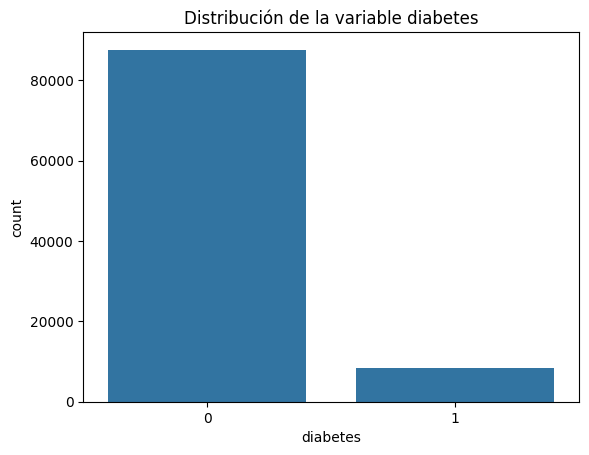

In [47]:
sns.countplot(x='diabetes', data=df)
plt.title('Distribución de la variable diabetes')
plt.show()

→ La prevalencia de diabetes en el dataset es baja (~8.8%)

→ La variable objetivo está claramente **desbalanceada**, con predominio de no diabéticos

→ La distribución es coherente con un escenario de cribado poblacional

### 4.2. Variables continuas

In [ ]:

def plot_distribucion_series(x, titulo="Distribución", bins=30):
    """Pinta Boxplot (arriba) + Histograma (abajo) para una Serie/array."""
    x = pd.Series(x).dropna()

    fig, (ax_box, ax_hist) = plt.subplots(
        2, 1, sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=(10, 6)
    )

    # 1) Boxplot (arriba)
    sns.boxplot(x=x, ax=ax_box, color="skyblue")
    ax_box.set(xlabel="")
    ax_box.set_title(titulo, fontweight="bold")

    # 2) Histograma (abajo)
    sns.histplot(x=x, ax=ax_hist, kde=True, color="dodgerblue", bins=bins)

    # Líneas de referencia: media y mediana
    ax_hist.axvline(x.mean(), color="red", linestyle="--", label=f"Media: {x.mean():.2f}")
    ax_hist.axvline(x.median(), color="green", linestyle="-", label=f"Mediana: {x.median():.2f}")
    ax_hist.legend()

    plt.tight_layout()
    plt.show()

#### 4.2.1. Variable `bmi`

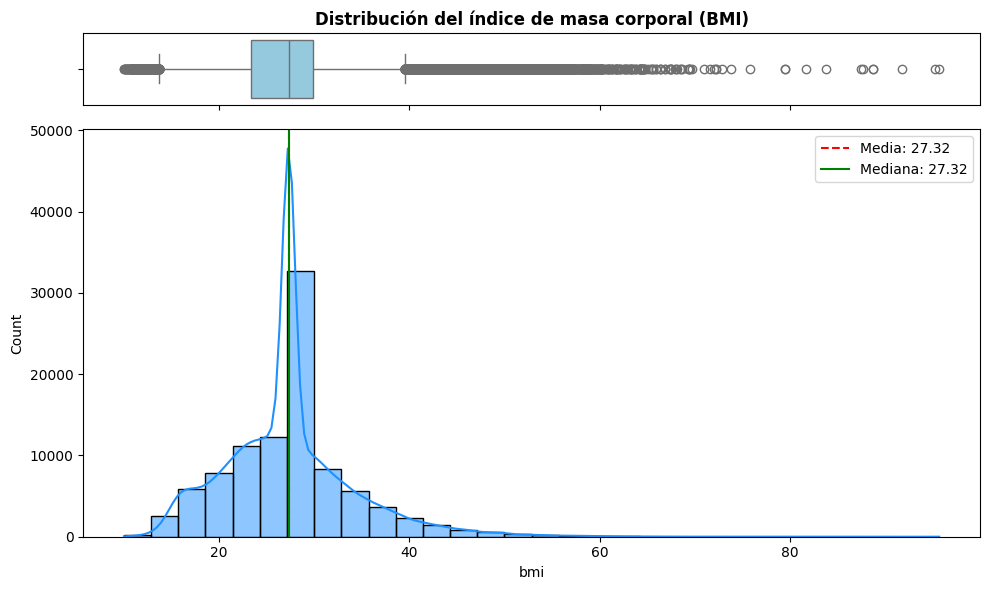

In [42]:
plot_distribucion_series(df["bmi"],
    titulo="Distribución del índice de masa corporal (BMI)",
    bins=30
)

In [43]:
df['bmi'].describe()

count    96128.000000
mean        27.321450
std          6.767811
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64

BMI presenta una distribución concentrada en valores clínicamente plausibles, pero con una cola derecha pronunciada y outliers extremos, que deberán ser tratados en fases posteriores para evitar distorsiones en el análisis.

#### 4.2.2. Variable `age`

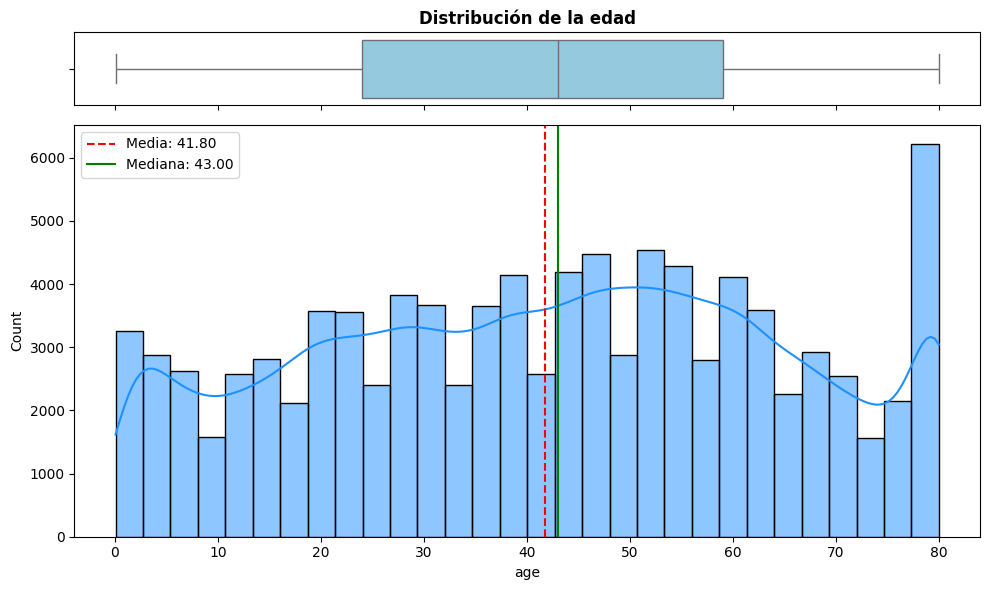

In [49]:
plot_distribucion_series(df["age"],
    titulo="Distribución de la edad",
    bins=30
)

In [50]:
df['age'].describe()

count    96128.000000
mean        41.796617
std         22.463329
min          0.080000
25%         24.000000
50%         43.000000
75%         59.000000
max         80.000000
Name: age, dtype: float64

→ La edad presenta un rango amplio (0.08–80 años), coherente con una población general que incluye desde recién nacidos hasta adultos mayores

→ La media (≈41.8) y la mediana (43) son muy próximas, lo que indica ausencia de asimetrías extremas

→ La distribución es relativamente homogénea, sin picos anómalos ni concentraciones artificiales

→ No se detectan outliers extremos ni valores clínicamente imposibles

→ La variabilidad observada es elevada (std ≈22.5), esperable dada la heterogeneidad de edades

→ La variable no requiere tratamiento previo para el análisis bivariante

#### 4.2.3. Variable `HbA1c_level`

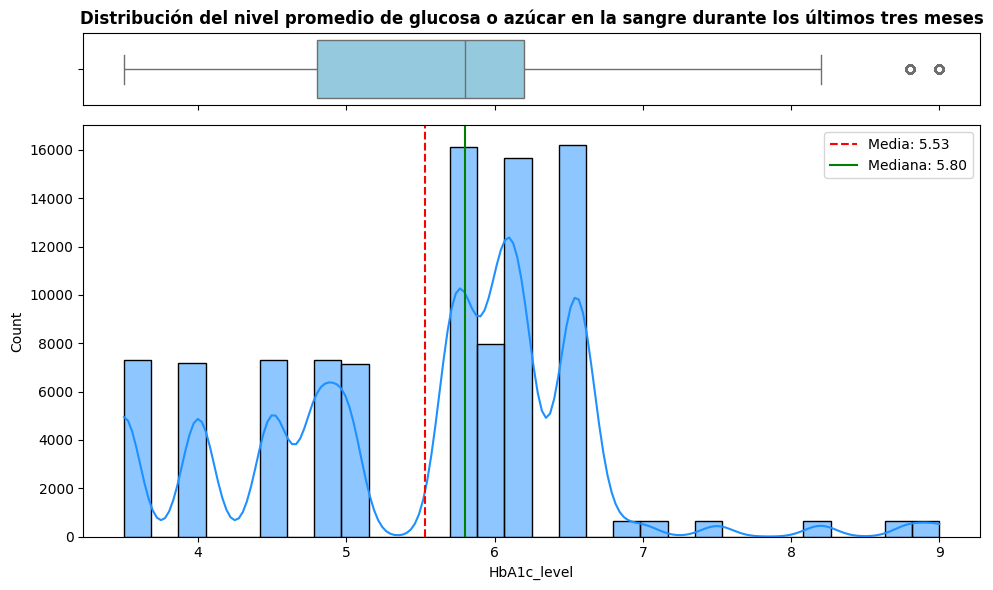

In [52]:
plot_distribucion_series(df["HbA1c_level"],
    titulo="Distribución del nivel promedio de glucosa o azúcar en la sangre durante los últimos tres meses",
    bins=30
)

In [53]:
df['HbA1c_level'].describe()

count    96128.000000
mean         5.532633
std          1.073225
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

→ La variable presenta un rango 3.5–9.0, plenamente coherente con valores clínicos reales

→ La mediana (5.8) es superior a la media (≈5.53), indicando una ligera asimetría a la izquierda

→ La mayor concentración de observaciones se sitúa entre 4.8 y 6.2, rango compatible con población no diabética y prediabética

→ Existen valores altos (≥7) poco frecuentes, compatibles con perfiles diabéticos, sin considerarse outliers erróneos

→ La dispersión es moderada (std ≈1.07), lo que sugiere buena capacidad discriminativa

→ La variable no presenta valores anómalos y no requiere tratamiento previo para el análisis bivariante

#### 4.2.4. Variable `blood_glucose_level`

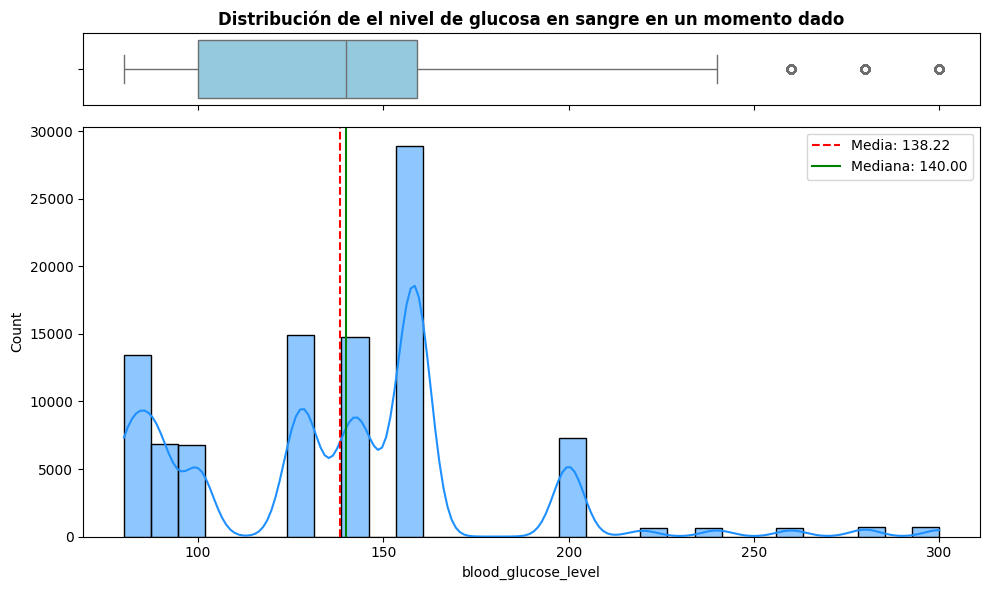

In [57]:
plot_distribucion_series(df["blood_glucose_level"],
    titulo="Distribución de el nivel de glucosa en sangre en un momento dado",
    bins=30
)

In [55]:
df['blood_glucose_level'].describe()

count    96128.000000
mean       138.218001
std         40.911190
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

→ La variable presenta un rango 80–300, compatible con valores clínicos reales en mediciones puntuales de glucosa

→ La mediana (140) es ligeramente superior a la media (≈138), indicando ligera asimetría a la izquierda

→ La mayor concentración de observaciones se sitúa entre 100 y 160, rango típico de población general y prediabética

→ Existen valores altos (≥200) poco frecuentes, coherentes con episodios hiperglucémicos y perfiles diabéticos

→ La dispersión es elevada (std ≈40.9), lo que sugiere heterogeneidad metabólica en la muestra

→ No se detectan valores imposibles; los extremos observados no se consideran errores, sino casos clínicamente plausibles

### 4.3. Variables binarias

#### 4.3.1. `hypertension`

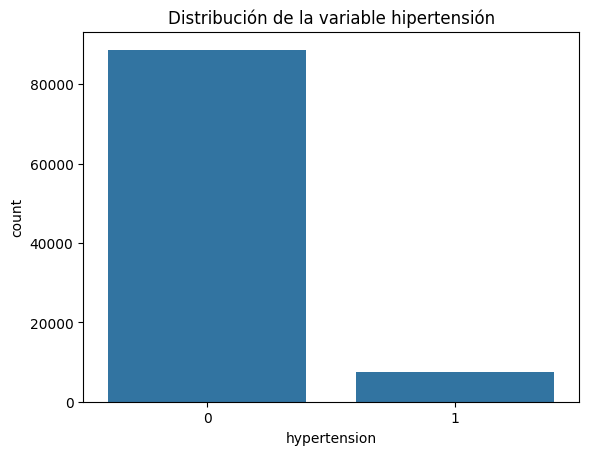

In [59]:
sns.countplot(x='hypertension', data=df)
plt.title('Distribución de la variable hipertensión')
plt.show()

In [60]:
df['hypertension'].value_counts(normalize=True) # Frecuencias relativas (proporciones)

hypertension
0    0.922385
1    0.077615
Name: proportion, dtype: float64

→ La hipertensión presenta una prevalencia baja (~7.8%) en el dataset

→ La variable está **desbalanceada**, con clara mayoría de individuos sin hipertensión

→ La frecuencia observada es clínicamente plausible para una población general

→ La baja prevalencia sugiere que la hipertensión puede actuar como **factor de riesgo**, no como característica dominante

→ La variable es informativa, pero su efecto deberá evaluarse en combinación con otras variables en el análisis bivariante

---

#### 4.3.2. `heart_disease`

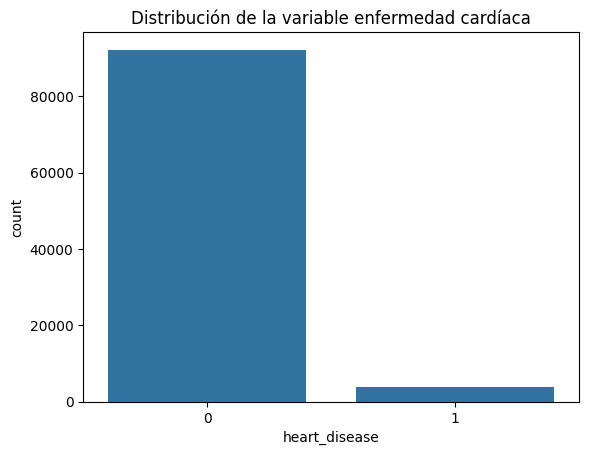

In [61]:
sns.countplot(x='heart_disease', data=df)
plt.title('Distribución de la variable enfermedad cardíaca')
plt.show()

In [63]:
df['heart_disease'].value_counts(normalize=True) # Frecuencias relativas (proporciones)

heart_disease
0    0.95919
1    0.04081
Name: proportion, dtype: float64

→ La enfermedad cardíaca presenta una **prevalencia muy baja** (~4.1%) en el dataset

→ La variable está fuertemente **desbalanceada**, con una clara mayoría de individuos sin patología cardíaca

→ La frecuencia observada es coherente clínicamente para una población general

→ Al tratarse de una condición poco frecuente, su impacto aislado puede ser limitado, pero **puede aportar señal relevante en combinación con otras variables**

→ Será importante vigilar posibles celdas con baja frecuencia en análisis bivariantes y tests estadísticos

---

### 4.4. Variables categóricas

#### 4.4.1. `gender`

In [64]:
freq_sex_rel = df["gender"].value_counts(normalize=True) * 100
freq_sex_rel

gender
Female    58.423144
Male      41.576856
Name: proportion, dtype: float64

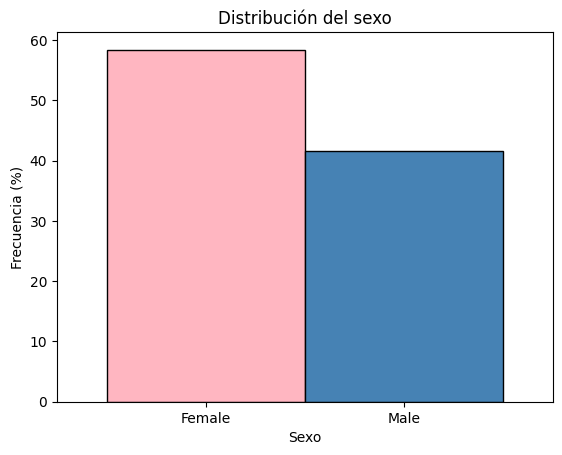

In [66]:
plt.figure()

freq_sex_rel.plot(
    kind="bar",
    width=1,
    color=["lightpink", "steelblue"],
    edgecolor='black'
)

plt.xlabel("Sexo")
plt.ylabel("Frecuencia (%)")
plt.title("Distribución del sexo")
plt.xticks(rotation=0)

plt.show()

→ La muestra presenta una **mayor proporción de mujeres** (~58.4%) frente a hombres (~41.6%)

→ La distribución por sexo es **razonablemente equilibrada**, sin desbalances extremos

→ No existen categorías residuales tras la limpieza, lo que facilita el análisis posterior

→ La variable es adecuada para análisis bivariantes y comparaciones entre grupos

→ El sexo podría actuar como factor modulador, pero no dominante, en el fenómeno estudiado

---

#### 4.4.2. `smoking_status`

In [68]:
freq_smoking_rel = df["smoking_status"].value_counts(normalize=True) * 100
freq_smoking_rel

smoking_status
never      35.780418
unknown    34.205434
former     20.446696
current     9.567452
Name: proportion, dtype: float64

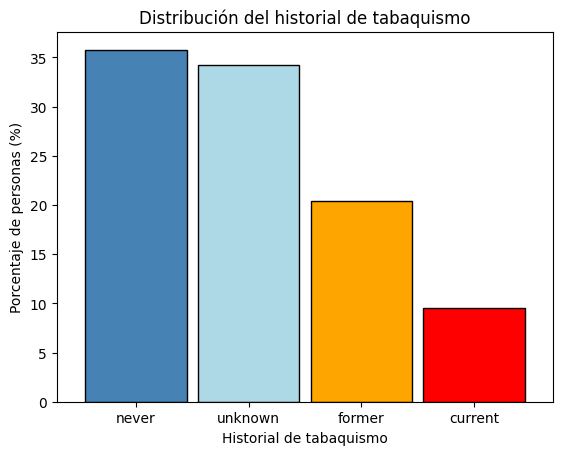

In [70]:
plt.figure()

freq_smoking_rel.plot(
    kind="bar",
    width=0.9,
    color = ["steelblue", "lightblue", "orange", "red"],
    edgecolor="black"
)

plt.xlabel("Historial de tabaquismo")
plt.ylabel("Porcentaje de personas (%)")
plt.title("Distribución del historial de tabaquismo")
plt.xticks(rotation=0)

plt.show()

→ La categoría más frecuente es never (~35.8%), seguida muy de cerca por unknown (~34.2%)

→ La **elevada proporción de historial de tabaquismo desconocido representa una limitación relevante** del dataset

→ Aproximadamente **30% de la muestra ha fumado en algún momento** (former + current)

→ El grupo de fumadores actuales (~9.6%) es minoritario pero suficientemente representado

→ La recodificación aplicada mejora la interpretabilidad y evita solapamientos semánticos

→ La variable es informativa, pero el peso de unknown deberá tenerse en cuenta en el análisis bivariante

---

## 5. Análisis bivariante

### 5.1.Relación entre variables categóricas y binarias y `diabetes`

#### 5.1.1 `gender` y `diabetes`

In [71]:
diabetes_rate_gender = (
    df
    .groupby("gender")["diabetes"]
    .mean() * 100   
).round(2)

diabetes_rate_gender

gender
Female     7.92
Male      10.10
Name: diabetes, dtype: float64

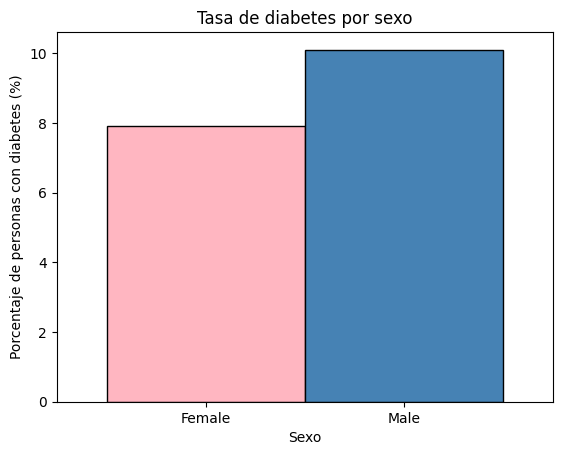

In [72]:
plt.figure()

diabetes_rate_gender.plot(
    kind="bar",
    width=1,
    color=["lightpink", "steelblue"],
    edgecolor="black"
)

plt.xlabel("Sexo")
plt.ylabel("Porcentaje de personas con diabetes (%)")
plt.title("Tasa de diabetes por sexo")
plt.xticks(rotation=0)



plt.show()

- **La tasa de diabetes es mayor en hombres (~10.1%)** que en mujeres (~7.9%)
- Se observa una **diferencia absoluta moderada** entre ambos sexos (~2.2 puntos porcentuales)
- El sexo podría actuar como **factor asociado** a la diabetes, aunque no determinante
- La asociación observada deberá ser **contrastada estadísticamente mediante un test Chi-cuadrado** en la fase de insights

---

#### 5.1.2 `smoking_status` y `diabetes`

In [74]:
diabetes_rate_smoking = (
    df
    .groupby("smoking_status")["diabetes"]
    .mean() * 100   
).round(2)

diabetes_rate_smoking

smoking_status
current    10.31
former     14.00
never       9.70
unknown     4.39
Name: diabetes, dtype: float64

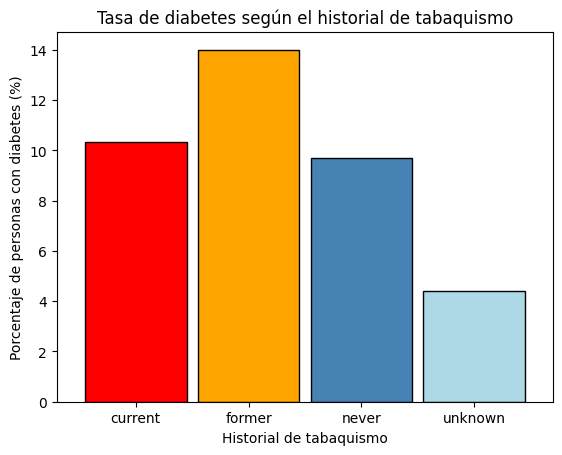

In [76]:
plt.figure()

diabetes_rate_smoking.plot(
    kind="bar",
    width=0.9,
    edgecolor="black",
    color = ["red", "orange", "steelblue", "lightblue"],
)

plt.xlabel("Historial de tabaquismo")
plt.ylabel("Porcentaje de personas con diabetes (%)")
plt.title("Tasa de diabetes según el historial de tabaquismo")
plt.xticks(rotation=0)


plt.show()

- **Los exfumadores (`former`) presentan la mayor tasa de diabetes (~14.0%)**
- Los **fumadores actuales (`current`) muestran una prevalencia elevada (~10.3%)**, superior a la de quienes nunca han fumado
- Las personas que **nunca han fumado (`never`) presentan una tasa intermedia (~9.7%)**
- El grupo con historial **desconocido (`unknown`) muestra la menor prevalencia (~4.4%)**, lo que sugiere posible infraestimación o sesgo de información
- El historial de tabaquismo parece estar **asociado a diferencias relevantes en la prevalencia de diabetes**
- La asociación observada deberá ser **contrastada estadísticamente mediante un test Chi-cuadrado** en la fase de insights

---


#### 5.1.3. `hypertension` y `diabetes`

In [77]:
diabetes_rate_hypertension = (
    df
    .groupby("hypertension")["diabetes"]
    .mean() * 100   
).round(2)

diabetes_rate_hypertension

hypertension
0     7.21
1    27.96
Name: diabetes, dtype: float64

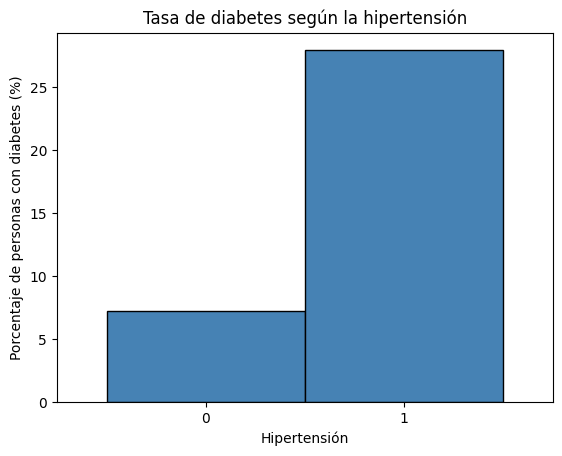

In [78]:
plt.figure()

diabetes_rate_hypertension.plot(
    kind="bar",
    width=1,
    color="steelblue",
    edgecolor="black"
)

plt.xlabel("Hipertensión")
plt.ylabel("Porcentaje de personas con diabetes (%)")
plt.title("Tasa de diabetes según la hipertensión")
plt.xticks(rotation=0)


plt.show()

- **La prevalencia de diabetes es mucho mayor en personas con hipertensión (~28.0%)** frente a personas sin hipertensión (~7.2%)
- Se observa una **diferencia absoluta muy elevada** (~20.7 puntos porcentuales)
- La hipertensión aparece como un **factor fuertemente asociado** a la diabetes
- La magnitud de la diferencia sugiere una **relación clínicamente relevante**, no solo estadística
- La asociación observada deberá ser **contrastada estadísticamente mediante un test Chi-cuadrado** en la fase de insights

---

#### 5.1.4. `heart_disease` y `diabetes`

In [79]:
diabetes_rate_heart = (
    df
    .groupby("heart_disease")["diabetes"]
    .mean() * 100   
).round(2)

diabetes_rate_heart

heart_disease
0     7.82
1    32.30
Name: diabetes, dtype: float64

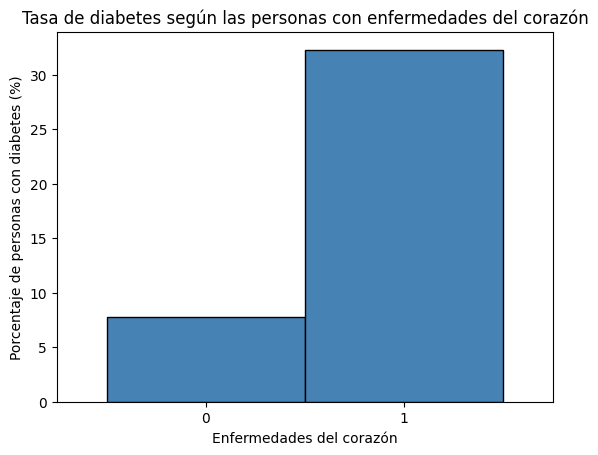

In [80]:
plt.figure()

diabetes_rate_heart.plot(
    kind="bar",
    width=1,
    color="steelblue",
    edgecolor="black"
)

plt.xlabel("Enfermedades del corazón")
plt.ylabel("Porcentaje de personas con diabetes (%)")
plt.title("Tasa de diabetes según las personas con enfermedades del corazón")
plt.xticks(rotation=0)


plt.show()

- **Las personas con enfermedad cardíaca presentan una prevalencia de diabetes muy elevada (~32.3%)** frente a quienes no la padecen (~7.8%)
- Se observa una **diferencia absoluta muy marcada** (~24.5 puntos porcentuales)
- La presencia de enfermedad cardíaca aparece como un **factor fuertemente asociado** a la diabetes
- La magnitud de la diferencia sugiere una **relación clínicamente relevante**
- La asociación observada deberá ser **contrastada estadísticamente mediante un test Chi-cuadrado** en la fase de insights

---


### 5.2. Relación entre variables continuas y diabetes

#### 5.2.1 `age` y `diabetes`

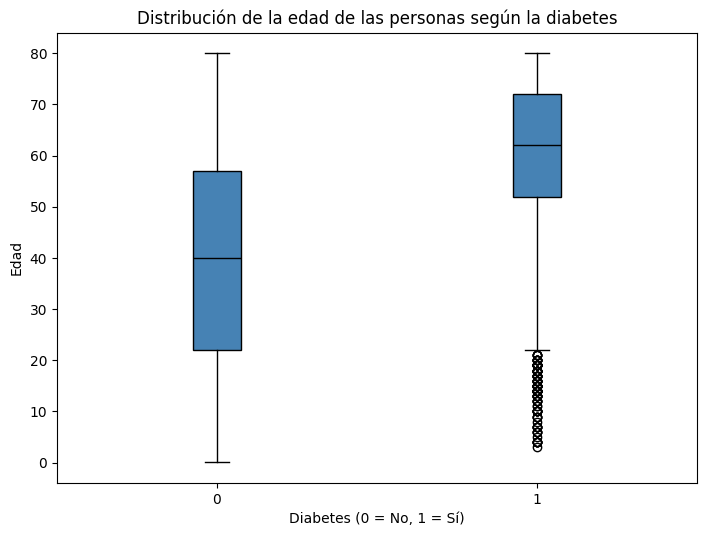

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))

df.boxplot(
    column="age",
    by="diabetes",
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="steelblue", alpha=1, edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    ax=ax
)

ax.set_xlabel("Diabetes (0 = No, 1 = Sí)")
ax.set_ylabel("Edad")
ax.set_title("Distribución de la edad de las personas según la diabetes")

# Quitar el título automático que añade pandas con 'by='
plt.suptitle("")

plt.show()


In [82]:
df.groupby("diabetes")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,87646.0,39.945362,22.228848,0.08,22.0,40.0,57.0,80.0
1,8482.0,60.925961,14.545301,3.00,52.0,62.0,72.0,80.0


- **Las personas con diabetes presentan una edad media mucho mayor** (~60.9 años) que las personas sin diabetes (~39.9 años)
- Se observa una **diferencia muy marcada en la mediana** (62 vs 40 años)
- El grupo con diabetes muestra una **distribución más concentrada**, con menor dispersión (std ≈14.5) que el grupo sin diabetes (std ≈22.2)
- La mayoría de los casos con diabetes se concentran en **edades superiores a 50 años**
- La edad aparece como un **factor fuertemente asociado** a la presencia de diabetes
- La diferencia observada será **contrastada estadísticamente mediante ANOVA o Kruskal-Wallis** en la fase de insights

---

#### 5.2.2 `bmi` y `diabetes`

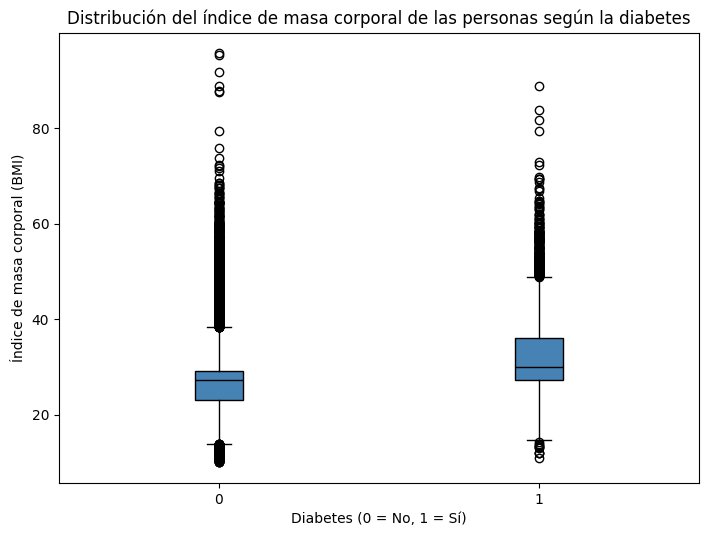

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))

df.boxplot(
    column="bmi",
    by="diabetes",
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="steelblue", alpha=1, edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    ax=ax
)

ax.set_xlabel("Diabetes (0 = No, 1 = Sí)")
ax.set_ylabel("Índice de masa corporal (BMI)")
ax.set_title("Distribución del índice de masa corporal de las personas según la diabetes")

# Quitar el título automático que añade pandas con 'by='
plt.suptitle("")

plt.show()

In [85]:
df.groupby("diabetes")["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,87646.0,26.868898,6.509934,10.01,23.00,27.320,29.17,95.69
1,8482.0,31.997755,7.563494,10.98,27.32,29.985,35.94,88.72


- **Las personas con diabetes presentan un BMI medio claramente superior** (~32.0) frente a las personas sin diabetes (~26.9)
- Se observa una **diferencia marcada en la mediana** (≈30.0 vs ≈27.3)
- El grupo con diabetes muestra una **dispersión mayor** (std ≈7.6) que el grupo sin diabetes (std ≈6.5)
- Los valores de BMI más elevados son **más frecuentes en el grupo con diabetes**
- La distribución sugiere una **asociación positiva entre BMI y diabetes**
- La diferencia observada será **contrastada estadísticamente mediante ANOVA o Kruskal-Wallis** en la fase de insights

---

#### 5.2.3 `HbA1c_level` y `diabetes`

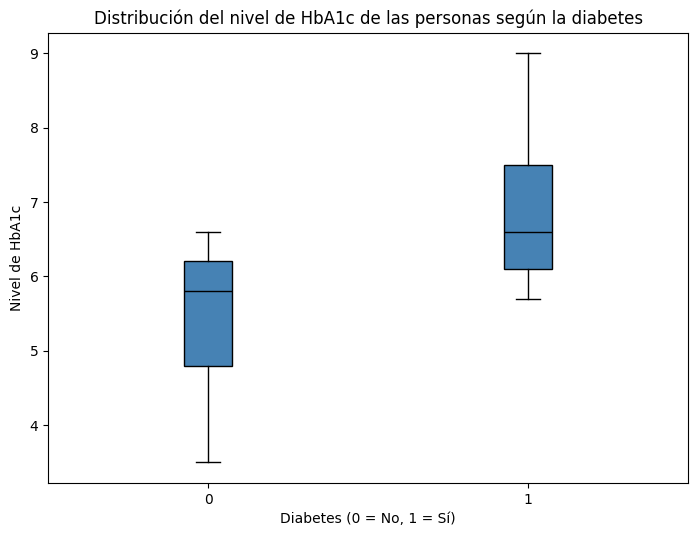

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))

df.boxplot(
    column="HbA1c_level",
    by="diabetes",
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="steelblue", alpha=1, edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    ax=ax
)

ax.set_xlabel("Diabetes (0 = No, 1 = Sí)")
ax.set_ylabel("Nivel de HbA1c")
ax.set_title("Distribución del nivel de HbA1c de las personas según la diabetes")

# Quitar el título automático que añade pandas con 'by='
plt.suptitle("")

plt.show()

In [87]:
df.groupby("diabetes")["HbA1c_level"].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,87646.0,5.396934,0.970804,3.5,4.8,5.8,6.2,6.6
1,8482.0,6.934827,1.076462,5.7,6.1,6.6,7.5,9.0


- **Las personas con diabetes presentan niveles de HbA1c significativamente más altos** (media ≈6.93) que las personas sin diabetes (media ≈5.40)
- Se observa una **diferencia clara en la mediana** (6.6 vs 5.8)
- El rango intercuartílico del grupo con diabetes se sitúa **mayoritariamente en valores clínicamente elevados** (≥6)
- La dispersión es ligeramente mayor en el grupo con diabetes, reflejando **heterogeneidad en el control glucémico**
- La separación entre distribuciones es **muy marcada**, con escaso solapamiento entre grupos
- El nivel de HbA1c aparece como un **factor fuertemente asociado** a la diabetes
- La diferencia observada será **contrastada estadísticamente mediante ANOVA o Kruskal-Wallis** en la fase de insights

---

#### 5.2.3 `blood_glucose_level` y `diabetes`

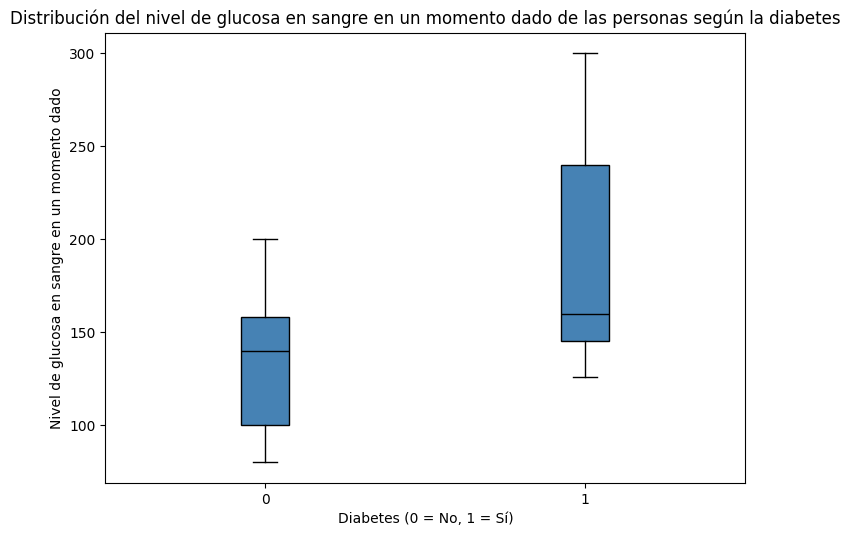

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))

df.boxplot(
    column="blood_glucose_level",
    by="diabetes",
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="steelblue", alpha=1, edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    ax=ax
)

ax.set_xlabel("Diabetes (0 = No, 1 = Sí)")
ax.set_ylabel("Nivel de glucosa en sangre en un momento dado")
ax.set_title("Distribución del nivel de glucosa en sangre en un momento dado de las personas según la diabetes")

# Quitar el título automático que añade pandas con 'by='
plt.suptitle("")

plt.show()

In [89]:
df.groupby("diabetes")["blood_glucose_level"].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,87646.0,132.817128,34.241611,80.0,100.0,140.0,158.0,200.0
1,8482.0,194.026173,58.630047,126.0,145.0,160.0,240.0,300.0


- **Las personas con diabetes presentan niveles de glucosa claramente más altos** (media ≈194) que las personas sin diabetes (media ≈133)
- Se observa una **diferencia muy marcada en la mediana** (160 vs 140)
- El grupo con diabetes muestra **mayor dispersión** (std ≈58.6 vs ≈34.2), indicando heterogeneidad metabólica
- Los **valores extremos elevados** (≥240) se concentran mayoritariamente en el grupo con diabetes
- Existe **poco solapamiento entre distribuciones**, especialmente en los cuartiles superiores
- El nivel de glucosa aparece como un **factor fuertemente asociado** a la diabetes
- La diferencia observada será **contrastada estadísticamente mediante ANOVA o Kruskal-Wallis** en la fase de insights

---


## 6. Análisis multivariante

### 6.1. Matriz de correlaciones para variables numéricas

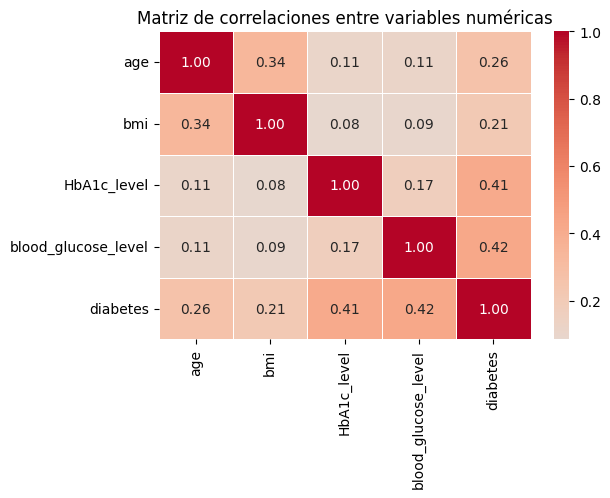

In [91]:
# Seleccionar variables numéricas relevantes
vars_num = [
    "age",
    "bmi",
    "HbA1c_level",
    "blood_glucose_level",
    "diabetes"
]

# Calcular matriz de correlaciones
corr_matrix = df[vars_num].corr()

# Crear el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Matriz de correlaciones entre variables numéricas")
plt.show()

- **HbA1c_level y blood_glucose_level presentan la mayor correlación con diabetes** (≈0.41 y ≈0.42), confirmando su fuerte relación metabólica con el target
- La **edad muestra una correlación moderada con diabetes** (≈0.26), coherente con los resultados bivariantes
- El **BMI presenta una correlación positiva pero más débil** con diabetes (≈0.21), sugiriendo un efecto indirecto o complementario
- HbA1c y nivel de glucosa están **moderadamente correlacionadas entre sí** (≈0.17), indicando información relacionada pero no completamente redundante
- La edad se correlaciona de forma moderada con el BMI (≈0.34), reflejando cambios corporales asociados al envejecimiento
- No se observan **correlaciones extremadamente altas entre variables explicativas**, lo que reduce el riesgo de multicolinealidad severa
- Las variables glucémicas aparecen como los **predictores numéricos más relevantes** a considerar en fases posteriores

---

#### 6.2. HbA1c estratificado por diabetes y hypertension

¿Por qué?

- HbA1c es la variable más fuerte

- Hipertensión es un factor clínico claro

- Permite ver si los diabéticos hipertensos tienen peor control glucémico

In [95]:
df.groupby(["diabetes", "hypertension"])["HbA1c_level"].describe()

count      mean       std  min  25%  50%  75%  max
diabetes hypertension                                                      
0        0             82271.0  5.396740  0.970653  3.5  4.8  5.8  6.2  6.6
         1              5375.0  5.399907  0.973196  3.5  4.5  5.8  6.2  6.6
1        0              6396.0  6.929112  1.076366  5.7  6.1  6.6  7.5  9.0
         1              2086.0  6.952349  1.076824  5.7  6.1  6.6  7.5  9.0


---

No diabéticos (diabetes = 0):

- Media HbA1c sin HTA: 5.3967
- Media HbA1c con HTA: 5.3999

- Mediana: idéntica (5.8)

➡️ Prácticamente iguales.

---

Diabéticos (diabetes = 1)

- Media HbA1c sin HTA: 6.9291
- Media HbA1c con HTA: 6.9523

- Mediana: idéntica (6.6)

➡️ De nuevo, prácticamente iguales.

---

Esto indica que:

- La **diabetes domina completamente el nivel de HbA1c**
- La **hipertensión NO añade variabilidad relevante a HbA1c una vez fijado el estado de diabetes** 
- El gran salto de HbA1c se da entre diabéticos y no diabéticos, no dentro de cada grupo por hipertensión

👉 Esto es un resultado negativo, pero muy informativo.

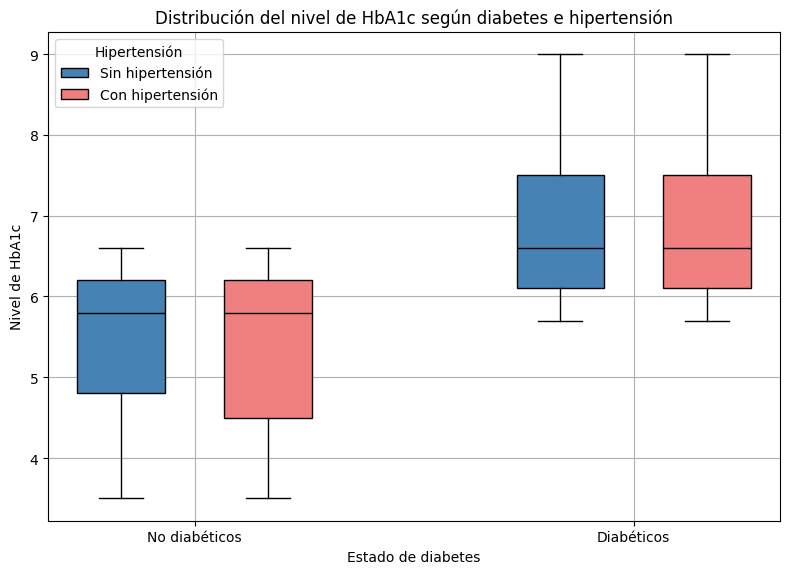

In [94]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(8, 6))

# No diabéticos
df[(df["diabetes"] == 0) & (df["hypertension"] == 0)].boxplot(
    column="HbA1c_level",
    positions=[1],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="steelblue", edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    ax=ax
)

df[(df["diabetes"] == 0) & (df["hypertension"] == 1)].boxplot(
    column="HbA1c_level",
    positions=[2],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="lightcoral", edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    ax=ax
)

# Diabéticos
df[(df["diabetes"] == 1) & (df["hypertension"] == 0)].boxplot(
    column="HbA1c_level",
    positions=[4],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="steelblue", edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    ax=ax
)

df[(df["diabetes"] == 1) & (df["hypertension"] == 1)].boxplot(
    column="HbA1c_level",
    positions=[5],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="lightcoral", edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    ax=ax
)

# Etiquetas eje X
ax.set_xticks([1.5, 4.5])
ax.set_xticklabels(["No diabéticos", "Diabéticos"])
ax.set_xlabel("Estado de diabetes")
ax.set_ylabel("Nivel de HbA1c")
ax.set_title("Distribución del nivel de HbA1c según diabetes e hipertensión")

# Leyenda manual
legend_elements = [
    Patch(facecolor="steelblue", edgecolor="black", label="Sin hipertensión"),
    Patch(facecolor="lightcoral", edgecolor="black", label="Con hipertensión")
]

ax.legend(handles=legend_elements, title="Hipertensión")

plt.suptitle("")
plt.tight_layout()
plt.show()



- El nivel de HbA1c muestra una **diferencia muy marcada entre personas con y sin diabetes**
- Dentro de cada grupo de diabetes, los niveles de HbA1c son **muy similares independientemente de la hipertensión**
- La hipertensión **no parece introducir variabilidad adicional relevante** en los niveles de HbA1c una vez considerado el estado de diabetes
- La diabetes actúa como el **factor dominante** en la determinación del nivel de HbA1c
- Este resultado sugiere una **ausencia de interacción relevante** entre hipertensión y HbA1c condicionada al estado de diabetes

---

## 7. Insights

### 7.1. Insight 1 — Edad y diabetes

**Observación**: Las personas con diabetes presentan edades claramente superiores a las personas sin diabetes.

- H₀ (nula): La distribución de la edad es la misma en ambos grupos.

- H₁ (alternativa): La distribución de la edad es diferente entre personas con y sin diabetes.

In [103]:
from scipy.stats import kruskal

# Separar los grupos
age_no_diabetes = df[df["diabetes"] == 0]["age"]
age_diabetes = df[df["diabetes"] == 1]["age"]

# Test de Kruskal-Wallis
stat, p_value = kruskal(age_no_diabetes, age_diabetes)

stat, p_value

(np.float64(6957.34025595834), np.float64(0.0))

#### Insight estadístico – `age` vs `diabetes`

- **Existen diferencias estadísticamente significativas en la edad** entre personas con y sin diabetes  
- El test de **Kruskal–Wallis rechaza la hipótesis nula** (p ≪ 0.001)  
- La edad se confirma como un **factor asociado relevante** a la presencia de diabetes  
- El resultado valida estadísticamente las diferencias observadas en el análisis exploratorio

---

### 7.2. Insight 2 — Índice de masa corporal (BMI) y diabetes

**Observación:**  
Las personas con diabetes presentan valores de índice de masa corporal (BMI) claramente superiores a los de las personas sin diabetes.

- **H₀ (nula):** La distribución del índice de masa corporal es la misma en personas con y sin diabetes.
- **H₁ (alternativa):** La distribución del índice de masa corporal es diferente entre personas con y sin diabetes.


In [104]:
# Separar los grupos
bmi_no_diabetes = df[df["diabetes"] == 0]["bmi"]
bmi_diabetes = df[df["diabetes"] == 1]["bmi"]

# Test de Kruskal-Wallis
stat, p_value = kruskal(bmi_no_diabetes, bmi_diabetes)

stat, p_value


(np.float64(3957.4530607906704), np.float64(0.0))

#### Insight estadístico – `bmi` vs `diabetes`

- **Existen diferencias estadísticamente significativas en el BMI** entre personas con y sin diabetes  
- El test de **Kruskal–Wallis rechaza la hipótesis nula** (p ≪ 0.001)  
- El índice de masa corporal se confirma como un **factor asociado relevante** a la presencia de diabetes  
- El resultado valida estadísticamente la asociación positiva observada en el análisis exploratorio

---


### 7.3. Insight 3 — Nivel de HbA1c y diabetes

**Observación:**  
Las personas con diabetes presentan niveles de HbA1c claramente superiores a los de las personas sin diabetes.

- **H₀ (nula):** La distribución del nivel de HbA1c es la misma en personas con y sin diabetes.
- **H₁ (alternativa):** La distribución del nivel de HbA1c es diferente entre personas con y sin diabetes.


In [105]:
# Separar los grupos
hba1c_no_diabetes = df[df["diabetes"] == 0]["HbA1c_level"]
hba1c_diabetes = df[df["diabetes"] == 1]["HbA1c_level"]

# Test de Kruskal-Wallis
stat, p_value = kruskal(hba1c_no_diabetes, hba1c_diabetes)

stat, p_value

(np.float64(10753.981081787844), np.float64(0.0))

#### Insight estadístico – `HbA1c_level` vs `diabetes`

- **Existen diferencias estadísticamente significativas en los niveles de HbA1c** entre personas con y sin diabetes  
- El test de **Kruskal–Wallis rechaza la hipótesis nula** (p ≪ 0.001)  
- El nivel de HbA1c se confirma como un **factor fuertemente asociado** a la presencia de diabetes  
- El resultado valida estadísticamente la clara separación observada entre grupos en el análisis exploratorio

---

### 7.4. Insight 4 — Nivel de glucosa en sangre y diabetes

**Observación:**  
Las personas con diabetes presentan niveles de glucosa en sangre claramente superiores a los de las personas sin diabetes.

- **H₀ (nula):** La distribución del nivel de glucosa en sangre es la misma en personas con y sin diabetes.
- **H₁ (alternativa):** La distribución del nivel de glucosa en sangre es diferente entre personas con y sin diabetes.


In [106]:
# Separar los grupos
glucose_no_diabetes = df[df["diabetes"] == 0]["blood_glucose_level"]
glucose_diabetes = df[df["diabetes"] == 1]["blood_glucose_level"]

# Test de Kruskal-Wallis
stat, p_value = kruskal(glucose_no_diabetes, glucose_diabetes)

stat, p_value


(np.float64(7475.07443933776), np.float64(0.0))

#### Insight estadístico – `blood_glucose_level` vs `diabetes`

- **Existen diferencias estadísticamente significativas en los niveles de glucosa en sangre** entre personas con y sin diabetes  
- El test de **Kruskal–Wallis rechaza la hipótesis nula** (p ≪ 0.001)  
- El nivel de glucosa en sangre se confirma como un **factor fuertemente asociado** a la presencia de diabetes  
- El resultado valida estadísticamente las diferencias observadas en el análisis exploratorio

---

### 7.5. Insight 5 — Hipertensión y diabetes

**Observación:**  
La prevalencia de diabetes es claramente superior en personas con hipertensión respecto a personas sin hipertensión.

- **H₀ (nula):** La presencia de hipertensión es independiente de la presencia de diabetes.
- **H₁ (alternativa):** Existe una asociación entre la presencia de hipertensión y la presencia de diabetes.


In [107]:
from scipy.stats import chi2_contingency

# Tabla de contingencia
contingency_table = pd.crosstab(df["hypertension"], df["diabetes"])

# Test Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value


(np.float64(3678.833168566628), np.float64(0.0))

#### Insight estadístico – `hypertension` vs `diabetes`

- **Existe una asociación estadísticamente significativa entre la hipertensión y la diabetes**
- El test de **Chi-cuadrado de independencia rechaza la hipótesis nula** (p ≪ 0.001)
- Las personas con hipertensión presentan una **prevalencia de diabetes notablemente superior**
- La hipertensión se confirma como un **factor clínicamente relevante asociado** a la diabetes
- El resultado valida estadísticamente la fuerte asociación observada en el análisis exploratorio

### 7.6. Insight 6 — Enfermedad cardíaca y diabetes

**Observación:**  
La prevalencia de diabetes es claramente superior en personas con enfermedad cardíaca respecto a quienes no la padecen.

- **H₀ (nula):** La presencia de enfermedad cardíaca es independiente de la presencia de diabetes.
- **H₁ (alternativa):** Existe una asociación entre la presencia de enfermedad cardíaca y la presencia de diabetes.


In [108]:
# Tabla de contingencia
contingency_table = pd.crosstab(df["heart_disease"], df["diabetes"])

# Test Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value


(np.float64(2798.0202220203837), np.float64(0.0))

#### Insight estadístico – `heart_disease` vs `diabetes`

- **Existe una asociación estadísticamente significativa entre la enfermedad cardíaca y la diabetes**
- El test de **Chi-cuadrado de independencia rechaza la hipótesis nula** (p ≪ 0.001)
- Las personas con enfermedad cardíaca presentan una **prevalencia de diabetes notablemente superior**
- La enfermedad cardíaca se confirma como un **factor clínicamente relevante asociado** a la diabetes
- El resultado valida estadísticamente la fuerte asociación observada en el análisis exploratorio

### 7.7. Insight 7 — Historial de tabaquismo y diabetes

**Observación:**  
La prevalencia de diabetes difiere entre los distintos grupos según el historial de tabaquismo.

- **H₀ (nula):** El historial de tabaquismo es independiente de la presencia de diabetes.
- **H₁ (alternativa):** Existe una asociación entre el historial de tabaquismo y la presencia de diabetes.

El test evalúa asociación global entre categorías, no comparaciones pareadas.
La interpretación de la categoría unknown debe hacerse con cautela por posible sesgo de información.


In [109]:
# Tabla de contingencia
contingency_table = pd.crosstab(df["smoking_status"], df["diabetes"])

# Test Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value


(np.float64(1514.8988600968232), np.float64(0.0))

#### Insight estadístico – `smoking_status` vs `diabetes`

- **Existe una asociación estadísticamente significativa entre el historial de tabaquismo y la diabetes**
- El test de **Chi-cuadrado de independencia rechaza la hipótesis nula** (p ≪ 0.001)
- La prevalencia de diabetes varía de forma relevante entre los distintos grupos de tabaquismo
- Los exfumadores y fumadores actuales presentan **tasas de diabetes más elevadas**
- La interpretación de la categoría `unknown` debe realizarse con cautela por posible **sesgo de información**
- El resultado valida estadísticamente las diferencias observadas en el análisis exploratorio

#### 7.7.2. Insight extra 1 — Test Chi-cuadrado excluyendo unknown

Comprueba si la asociación tabaquismo–diabetes se mantiene cuando se elimina el grupo problemático.

In [110]:
# Excluir unknown
df_no_unknown = df[df["smoking_status"] != "unknown"]

# Tabla de contingencia
ct = pd.crosstab(df_no_unknown["smoking_status"], df_no_unknown["diabetes"])

# Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(ct)

chi2, p_value


(np.float64(241.1183276204157), np.float64(4.3834939789603135e-53))

##### Análisis de sensibilidad — `smoking_status` vs `diabetes` (excluyendo `unknown`)

- Tras excluir la categoría `unknown`, **la asociación entre el historial de tabaquismo y la diabetes se mantiene estadísticamente significativa**
- El test de **Chi-cuadrado de independencia rechaza la hipótesis nula** (p ≪ 0.001)
- Este resultado indica que la relación observada **no está impulsada únicamente por la categoría con información desconocida**
- La asociación entre tabaquismo y diabetes se considera **robusta frente al posible sesgo de información**
- La exclusión de `unknown` refuerza la validez de las conclusiones obtenidas en el análisis principal

---


#### 7.7.3. Insight extra 2 — ¿La categoría `unknown` se comporta como un grupo distinto o se parece a `never`?

In [111]:
df_subset = df[df["smoking_status"].isin(["unknown", "never"])]

ct = pd.crosstab(df_subset["smoking_status"], df_subset["diabetes"])

chi2, p_value, dof, expected = chi2_contingency(ct)

chi2, p_value


(np.float64(716.3449256795698), np.float64(8.345466592408415e-158))

##### Insight extra — Comportamiento de la categoría `unknown` frente a `never

- **Existen diferencias estadísticamente significativas entre las categorías `unknown` y `never` en la prevalencia de diabetes**
- El test de **Chi-cuadrado de independencia rechaza la hipótesis nula** (p ≪ 0.001)
- La categoría `unknown` **no se comporta como un grupo equivalente a quienes nunca han fumado**
- Este resultado refuerza la idea de que `unknown` **no puede interpretarse como un proxy de no fumador**
- La baja prevalencia observada en `unknown` debe interpretarse con cautela, siendo consistente con un **posible sesgo de información o infraregistro**
- Se justifica tratar `unknown` como una **categoría separada** o excluirla en análisis inferenciales sensibles

---

### 7.8. Insight 8 — Sexo y diabetes


**Observación:**  
La prevalencia de diabetes es mayor en hombres que en mujeres, aunque la diferencia observada es moderada.

- **H₀ (nula):** El sexo es independiente de la presencia de diabetes.
- **H₁ (alternativa):** Existe una asociación entre el sexo y la presencia de diabetes.

In [112]:
# Tabla de contingencia
contingency_table = pd.crosstab(df["gender"], df["diabetes"])

# Test Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value


(np.float64(137.34939636195776), np.float64(1.0112949442961092e-31))

#### Insight estadístico – `gender` vs `diabetes`

- **Existe una asociación estadísticamente significativa entre el sexo y la diabetes**
- El test de **Chi-cuadrado de independencia rechaza la hipótesis nula** (p ≪ 0.001)
- Los hombres presentan una **prevalencia de diabetes superior** a la de las mujeres
- La magnitud del efecto es **moderada**, lo que indica que el sexo actúa como **factor asociado pero no determinante**
- El resultado valida estadísticamente la diferencia observada en el análisis exploratorio

---

### 7.9. Insight 9 — HbA1c e hipertensión condicionado al estado de diabetes

**Observación:**  
Una vez fijado el estado de diabetes, la hipertensión no parece modificar de forma relevante los niveles de HbA1c.

**Contraste estadístico (análisis estratificado):**
- **Estrato 1 (No diabéticos, diabetes = 0)**
  - **H₀ (nula):** La distribución de HbA1c es la misma en personas con y sin hipertensión.
  - **H₁ (alternativa):** La distribución de HbA1c es diferente entre personas con y sin hipertensión.
- **Estrato 2 (Diabéticos, diabetes = 1)**
  - **H₀ (nula):** La distribución de HbA1c es la misma en personas con y sin hipertensión.
  - **H₁ (alternativa):** La distribución de HbA1c es diferente entre personas con y sin hipertensión.


In [113]:
# ---- Estrato 1: No diabéticos (diabetes = 0) ----
hba1c_noDM_noHT = df[(df["diabetes"] == 0) & (df["hypertension"] == 0)]["HbA1c_level"]
hba1c_noDM_HT   = df[(df["diabetes"] == 0) & (df["hypertension"] == 1)]["HbA1c_level"]

stat0, p0 = kruskal(hba1c_noDM_noHT, hba1c_noDM_HT)

# ---- Estrato 2: Diabéticos (diabetes = 1) ----
hba1c_DM_noHT = df[(df["diabetes"] == 1) & (df["hypertension"] == 0)]["HbA1c_level"]
hba1c_DM_HT   = df[(df["diabetes"] == 1) & (df["hypertension"] == 1)]["HbA1c_level"]

stat1, p1 = kruskal(hba1c_DM_noHT, hba1c_DM_HT)

(stat0, p0), (stat1, p1)


((np.float64(0.057401089777345725), np.float64(0.8106518042051434)),
 (np.float64(1.2604624791711014), np.float64(0.26156356775035317)))

#### Insight estadístico — HbA1c e hipertensión condicionado al estado de diabetes

- **No se detectan diferencias estadísticamente significativas en los niveles de HbA1c según la hipertensión** ni en personas sin diabetes (p ≈ 0.81) ni en personas con diabetes (p ≈ 0.26)
- El test de **Kruskal–Wallis no permite rechazar la hipótesis nula en ninguno de los dos estratos**
- La **hipertensión no introduce variabilidad adicional relevante** en los niveles de HbA1c una vez considerado el estado de diabetes
- La **diabetes se confirma como el factor dominante en la determinación del nivel de HbA1c**
- Este resultado evidencia una **ausencia de interacción relevante** entre hipertensión y HbA1c condicionada al estado de diabetes

---

## 8. Insight de jerarquías de variables — ¿Qué variables muestran una asociación más fuerte con la diabetes en este dataset?

Usamos los estadísticos de los tests que ya aplicados

### Tabla resumen — Jerarquía de variables asociadas a la diabetes


#### Variables continuas (Test de Kruskal–Wallis)

| Variable              | Estadístico H | p-valor |
|-----------------------|---------------|--------|
| HbA1c_level           | ≈ 10 754      | < 0.001 |
| blood_glucose_level   | ≈ 7 475       | < 0.001 |
| age                   | ≈ 6 957       | < 0.001 |
| bmi                   | ≈ 3 957       | < 0.001 |

#### Variables categóricas / binarias (Test Chi-cuadrado)

| Variable            | Estadístico χ² | p-valor |
|---------------------|----------------|--------|
| hypertension        | ≈ 3 679        | < 0.001 |
| heart_disease       | ≈ 2 798        | < 0.001 |
| smoking_status      | ≈ 1 515        | < 0.001 |
| gender              | ≈ 137          | < 0.001 |


### Insight A — Jerarquía de variables asociadas a la diabetes

- Las variables glucémicas (**HbA1c** y **nivel de glucosa en sangre**) presentan las asociaciones más fuertes con la diabetes, mostrando los mayores valores del estadístico de contraste
- La **edad** aparece como el principal factor demográfico asociado a la diabetes, con una asociación fuerte pero inferior a las variables glucémicas
- El **índice de masa corporal (BMI)** muestra una asociación relevante, aunque de menor magnitud que la edad
- Las variables clínicas binarias (**hipertensión** y **enfermedad cardíaca**) actúan como factores de riesgo importantes, con asociaciones estadísticamente significativas
- El **historial de tabaquismo** y el **sexo** presentan asociaciones más moderadas con la diabetes
- Este análisis permite establecer una **jerarquía clara de variables**, siendo las variables metabólicas las más informativas en la explicación de la diabetes en este dataset

---

## 9. ¿La asociación entre la hipertensión y la diabetes es igual en personas jóvenes y mayores?

Se sabe que la hipertensión está asociada a la diabetes, aquí se estudia si esa asociación es igual en jóvenes (<50) que en mayores (>50).

### Por qué la hipertensión?

- Es un factor de riesgo clínico claro y binario, fácil de interpretar al estratificar (sí/no), a diferencia de variables continuas que exigirían más supuestos.

- Tiene una asociación fuerte con diabetes (χ² alto), lo que la hace candidata natural a estudiar cómo cambia esa asociación según la edad.

- Está fisiológicamente ligada a la edad, pero no es redundante con ella. Esto permite analizar modulación sin colinealidad directa.

- Es clínicamente interpretable: tiene sentido preguntarse si la hipertensión “pesa” igual en jóvenes que en mayores.

- Evita redundancias:

-- HbA1c y glucosa ya son variables dominantes y muy correlacionadas con diabetes → estratificarlas por edad aporta poco.

-- BMI también se podría usar, pero su relación con la edad es más difusa y la interpretación sería menos clara.

-- Sexo y tabaquismo muestran asociaciones más débiles; estratificarlas daría insights menos robustos.

### Crear grupos de edad:

In [ ]:
df["age_group"] = (df["age"] >= 50).map({False: "<50", True: "≥50"})


### Tablas de contingencia estratificadas:

In [115]:
# Menores de 50
ct_young = pd.crosstab(
    df[df["age_group"] == "<50"]["hypertension"],
    df[df["age_group"] == "<50"]["diabetes"]
)

# Mayores o iguales a 50
ct_old = pd.crosstab(
    df[df["age_group"] == "≥50"]["hypertension"],
    df[df["age_group"] == "≥50"]["diabetes"]
)

ct_young, ct_old


(diabetes          0     1
 hypertension             
 0             54853  1433
 1              1181   274,
 diabetes          0     1
 hypertension             
 0             27418  4963
 1              4194  1812)

### Test Chi-cuadrado en cada estrato

In [116]:
chi2_y, p_y, _, _ = chi2_contingency(ct_young)
chi2_o, p_o, _, _ = chi2_contingency(ct_old)

(chi2_y, p_y), (chi2_o, p_o)

((np.float64(1305.5472344091795), np.float64(7.042581221008673e-286)),
 (np.float64(766.9387539188609), np.float64(8.324552400266142e-169)))

### Insight B — Edad como variable moduladora (resumen)

- La asociación entre hipertensión y diabetes es **estadísticamente significativa** tanto en <50 años como en ≥50 años
- La **magnitud de la asociación es mayor en personas menores de 50 años**
- En edades avanzadas, la asociación persiste pero es **menos intensa**, probablemente por la concurrencia de otros factores de riesgo
- La edad actúa como **variable moduladora** en la relación hipertensión–diabetes -> afecta a la intensidad de la asociación

---
